In [ ]:
from util import create_dataset 
create_dataset('data/original_dataset_0.60_0.30_0.10', 2500, down_sample=False, aug_val=True,image=False, instance=0, save_weight=True)

In [23]:
from scipy import stats
print(stats.norm.pdf(-1))

0.24197072451914337


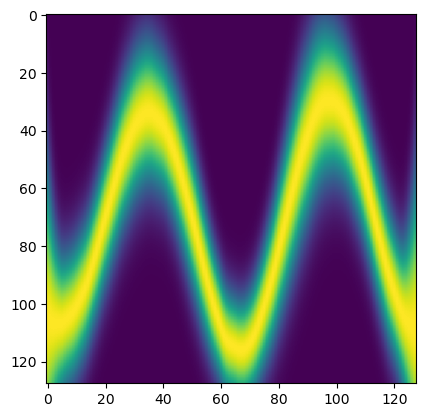

In [3]:
from LightCurve import CRTS_VS_LightCurve
from util import get_meta_information
info_file = 'data/SSS_Per_Tab.txt'
info = get_meta_information(info_file)
lc = CRTS_VS_LightCurve()
test_sample1 = 'data/original_data/type/5/3073022027812.dat' 
lc.read_CRTS_dat(test_sample1, id='3073022027812')
period = info.loc[int(lc.id), 'Period']
lc.fold(period, normalize_phase=False)
# lc.show()

import random
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,period, 200)
image = lc.to_image()
# plt.imshow(image)
lc = lc.generate_GP_simulation(x, phase_shift_ratio=0.4)


uncertainty_map = lc.to_uncertainty_map()
plt.imshow(uncertainty_map)


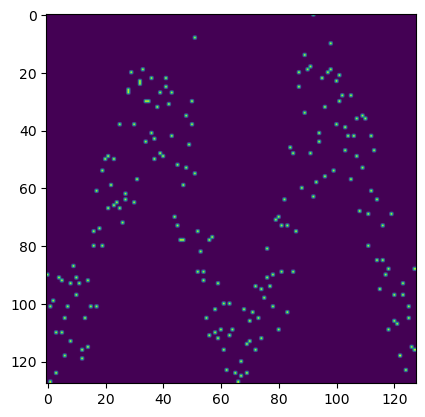

In [4]:
# lc = lc.generate_GP_simulation(x, phase_shift_ratio=0.5)
image = lc.to_image()
plt.imshow(image)

In [1]:
import numpy as np
x = np.linspace(0,1,10)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
x = np.linspace(0,1,300)
y = np.random.standard_normal(300)
figsize=(4,4)
dpi=32
fig = plt.figure(figsize=figsize,dpi=dpi)
fig.patch.set_facecolor('black')
plt.scatter(x,y, s=4,c='w')
plt.axis('off')
plt.subplots_adjust(top=1, bottom=0, right=1, left=0)
plt.margins(0,0)
fig.canvas.draw()
w, h = fig.canvas.get_width_height()
buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
buf.shape = (w, h, 4)
buf = np.roll(buf, 3, axis=2)
image = Image.frombytes("RGBA", (w, h), buf.tostring())
image = image.convert('L')
image.show()

In [ ]:
from util import create_dataset

for i in range(5,10):
    original_dataste = 'data/original_dataset_10fold_No%d'%i
    create_dataset(original_dataste, class_size=15000, down_sample=False,save_weight=True)


In [ ]:

'''
这里有错误，生成的train_data是重复的
'''
from curses import use_default_colors
from util import create_dataset
import pickle
f1 = open('data/original_dataset_0.80_0.10_0.10', 'rb')
train_data, val_data, test_data = pickle.load(f1)
f1.close()
for i in range(0,1):
    create_dataset('data/original_dataset_0.80_0.10_0.10',2500, down_sample=True, instance=i,
        use_pre_load=True, pre_loaded = (train_data, val_data, test_data))

In [ ]:
from util import  create_dataset_exclude_origin_multi_test
create_dataset_exclude_origin_multi_test('data/original_dataset_0.80_0.10_0.10',5000, 
                                            down_sample=True, multi_test=10)

In [ ]:
import pickle
from util import get_sample_cadence
f = open('data/original_dataset_0.80_0.10_0.10', 'rb')
train_data, val_data, test_data = pickle.load(f)
f.close()
flatten_train_data = []
for type in train_data:
    for sample in type:
        flatten_train_data.append(sample)

In [ ]:
lc = flatten_train_data[4474]
lc.show()
x = get_sample_cadence(flatten_train_data, lc.period)
lc_simu = lc.generate_GP_simulation(x)
lc_simu.show()

In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
b2 = np.array([[5,6],[7,8]])
c = [a,b, b2]
d = np.array(c)
print(type(d))
print(d)
print(d.shape)

In [ ]:
for i in range(0,3):
    print(i)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(0,1,100)
x = np.sort(x)
y = np.linspace(0,1,100)
plt.scatter(x,y)